<img style="float: right; width: 320px; display: inline" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/LMU_Muenchen_Logo.svg/2000px-LMU_Muenchen_Logo.svg.png">
<p>  
    <font face='Helvetica' size='5.6'><b>Seismology Computer Lab: Locating Earthquakes</b></font><br><br> 
    <font face='Helvetica' size='4.6'>Ludwig-Maximilians-Universität München</font><br> 
    <font face='Helvetica' size='3'>Dr. Alice-Agnes Gabriel, based on work of Karin Sigloch</font><br> 
    <font face='Helvetica' size='3'>Python v. translated by Noah Luna</font> 
</p>

---
---

<h2>Part I: Background</h2>

<p>This lab deals with earthquake location as an example of a small, non-linear, but linearizable inverse problem. Earthquake location is a basic and important service that seismologists deliver, usually through national or regional earthquake services. An example would be the Bavarian earthquake service run by LMU (Bayrischer Erdbebendienst, a.k.a. “BayWatch”), which currently deploys 24 seismic stations across the state. The rapid detection and location of a quake is important for immediate emergency response and for mitigation of future earthquake damage, which will usually occur in a similar location.</p>

<p>Our monitoring network here consists of $10$ seismic stations distributed irregularly over a surface area of $50 km \times 50 km$. Our data $d$ are the measured arrival times $T_{i}$ of the first-arriving P-waves. There is a time measurement uncertainty $\sigma_{i}^{(d)}$ associated with reading $T_{i}$ from a seismogram. This uncertainty is related to the time interval it takes for the emergent amplitude to clearly rise above the ambient seismic noise. We assume that our measurements $T_{i}$ are uncorrelated and that the standard deviation of the measurement error is the same for all measurements $i$: $\sigma_{i}^{(d)} = \sigma$</p>

<p>In this lab exercise, the data $T_{i}$ are generated synthetically/analytically, by solving the forward problem $d = g(m)$ and adding some Gaussian noise to mimic real-world conditions. Compared to measuring real data in the field, this is kind of cheating of course. But actually knowing the true solution allows us to assess and compare the performance of different designs for the network geometry. (A good idea before spending a lot of money on hardware.)</p>

<p>As a simplification, we assume that P-wave velocity in the area of the network is a constant and known quantity $(v = 5 \frac{km}{s})$. The forward problem then takes the non-linear but simple analytical form</p>

$$d_{i} = T_{i}(x_{i},y_{i}) + t = \frac{1}{v} \sqrt{(x_{i}-x_{s})^2 + (y_{i}-y_{s})^2 + (z_{i}-z_{s})^2 } + t $$

<p>where $m = (x_{s}, y_{s}, z_{s}, t)$ are the four parameters to estimate (source longitude, latitude, depth, and time of rupture), and xi are the station locations.</p>

<ol>
    <li>How would you informally describe the modeling assumptions/physics expressed by
        the forward formula above?</li>
    <li>Why is this a non-linear inverse problem?</li>
</ol>

In more realistic, non-homogeneous media, the forward problem gets quite involved, but this does not really change the characteristics of the inverse problem, which we are about to explore. In order for the inverse problem to be linearizable from $d = g(m)$ to $d = Gm$, we need a rough starting guess $m_{0} = (x_{0}, y_{0}, z_{0}, t_{0})$ for where the earthquake occurred. (The default guess lies in the rough area where earthquakes always tend to come from, e.g. where the last quake happened.) We linearize by computing the first derivative of each datum with respect to each parameter (first term in the Taylor expansion) around the point $m_{0}$, and neglecting all higher-order derivatives:

$$G_{ij} = \frac{\partial d_{i}}{m_{j}}\mid_{m=m_{0}}$$

<p>For example, element $G_{12}$ of matrix $G$ is the partial derivative of arrival time at station $1$ $(T_{1})$ with respect to source latitude $y_{s0}$.</p>
<p>Our software computes the so-called “least-squares solution”, which minimizes the $L_{2}$ norm of $\|d−Gm\|_{2}$:</p>

$$m^{lsq} = G^{-g}d$$
where
$$G^{-g}= (G^{T}G)^{-1}G^{T} $$

<p>By solving this linear problem repeatedly, we hope to converge toward the true solution of the nonlinear problem. Using $G|_{m=m_{0}}$, we update the solution to $m_{1} = (x_{1}, y_{1}, z_{1}, t_{1})$, which is hopefully closer to the real quake location than $m_{0}$. We recompute the partial derivatives for $G\mid_{m=m_{1}}$, solve for $m_{2}$, and so on, until $m$ no longer changes. Whether and how this procedure converges toward the true quake location is the subject of this lab.</p>

<h2>Part II: Experiment</h2>

<p>First, execute Cell II.A  to import the necessary libraries and modules.</p>

<p>Read over and then run Cell II.B. Lines 1-6 of this cell contain parameter settings you will need to modify in the course of this lab. You will be doing many runs of this program, so keep a log with notes about individual runs. <b>In the end, write a lab report summing up your findings with a few of the most informative plots, sketches and text.</b></p>

<p>The true location of <span style="font-family: Courier;">event1</span>, as well as its starting guess <span style="font-family: Courier;">guess1</span>, are located inside the area of the sensor network. Do a number of runs using <span style="font-family: Courier;">event1</span>, first with minimal noise
(e.g., $\sigma = 0.01 s$), then with increasing amounts of noise. For real seismograms, the reading uncertainty could easily amount to $0.2 s$ or more. Each noise realization is different, so it is interesting to do multiple runs for identical noise levels.</p>
<p><h3>Observations:</h3>
<ol>
    <li>How many iterations it takes for the solution to converge, and how much each iteration contributes to reducing the predicted misfit.</li>
    <li>How close each component of the final solution is to the true earthquake location.</li>
    <li>To assess whether the inversion works properly, we often consider a statistic called normalized
prediction error (or “normalized chi-square”):


$$ \chi^{2} = \frac{1}{N} \sum_{i=1}^{10} \frac{(T_{i}^{obs} - T_{i}^{pred})^2}{\sigma^{2}}$$

$ \chi^{2}$ should be on the order of 1. This is the case when most or all summation terms are on the order of 1. Describe in words the physical meaning of the expression inside the sum.
So why can we expect an acceptable solution to produce a $ \chi^{2} \approx 1$?<br>
(When working with real data, we need to know/estimate $\sigma$ a priori. Sometimes it happens that we obtain chi-squares that are orders of magnitude different from 1. What is the likely problem in such a case?)</li>
<li>Note whether in your runs, $ \chi^{2} \approx 1$? (screen output).</li>
<li>Whether, at some noise level, the solution no longer converges. What exactly happens
(divergence, oscillations,...)? What is the reason?</li>
</ol>
</p>

<h3>Cell II.A [Run this first]</h3>

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from numpy import matrix
%matplotlib inline

#Function to retrieve eigenvalues and eigenvectors from covariance matrix.
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

<h3>Cell II.B</h3>


----------------------------------------
Iteration 0
---------------------------------------- 

Standard deviation sigma_d of measurement uncertainty (in sec):  0.10

True Solution
        xs(km)        ys(km)        zs(km)        ts(s)
         0.00          0.00         10.00          0.00

Estimated solutions and their estimated standard deviations
 iter    xs(km)    ys(km)    zs(km)    ts(km)    std(xs)    std(ys)    std(zs)    std(ts)
   0      3.00      4.00     20.00      2.00       0.00       0.00       0.00       0.00



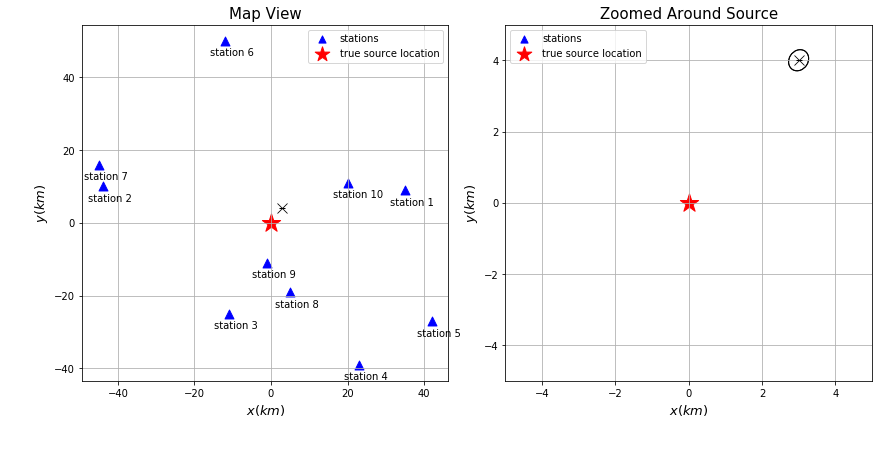

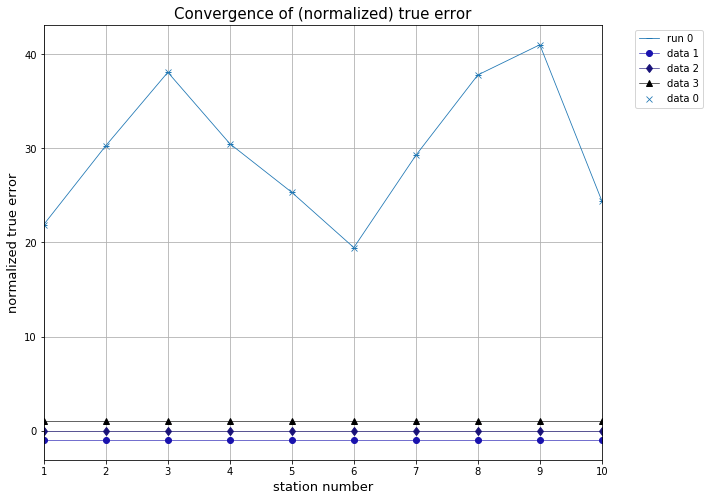


Run another iteration?: [y/n]: y
You entered [yes].

----------------------------------------
Iteration 1
---------------------------------------- 

Standard deviation sigma_d of measurement uncertainty (in sec):  0.10

True Solution
        xs(km)        ys(km)        zs(km)        ts(s)
         0.00          0.00         10.00          0.00

Estimated solutions and their estimated standard deviations
 iter    xs(km)    ys(km)    zs(km)    ts(km)    std(xs)    std(ys)    std(zs)    std(ts)
   0      3.00      4.00     20.00      2.00       0.00       0.00       0.00       0.00
   1     -0.51     -0.78      9.85      0.24       0.27       0.30       1.09       0.11



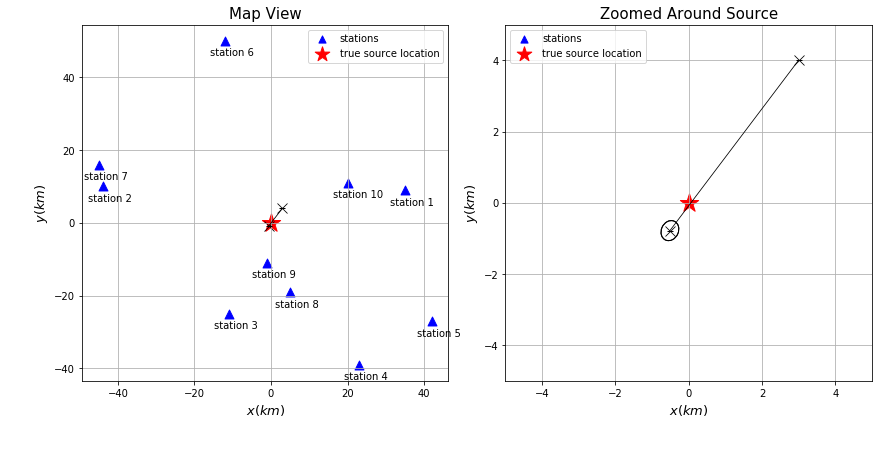

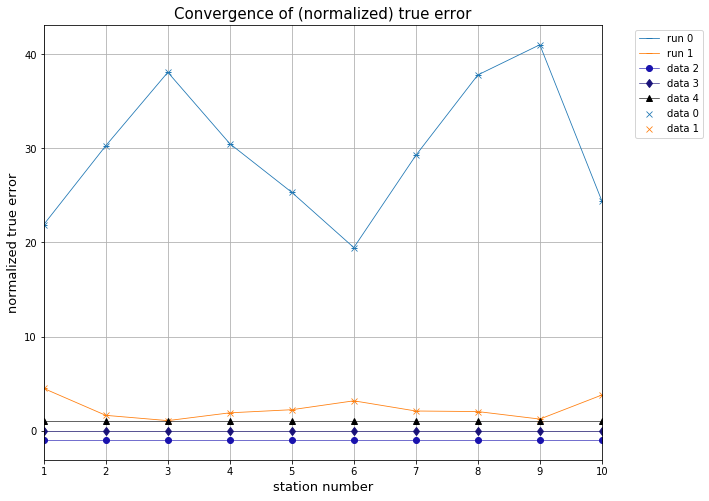


Run another iteration?: [y/n]: n
Iteration cancelled.


In [2]:
#Initial guess for earthquake location and time: x y z t
event1 = np.array([0.0, 0.0, 10.0, 0.0])
guess1 = np.array([3.0, 4.0,  20.0,  2.0])

event2 = np.array([40.0, 60.0, 10.0, 0.0])
guess2 = np.array([35.0, 65.0, 20.0, 2.0])

##Edit here to select an event
event = event1
guess = guess1

##EDIT HERE: Standard deviation of the Gaussian measurement noise that is
# assumed to be present in each traveltime measurement.
sigma_d = 0.1;  # in sec

# We are inverting for xs, ys, zs, ts
xs_true = event[0]
ys_true = event[1]
zs_true = event[2]
ts_true = event[3]

#Initial guess.
xs0 = guess[0]
ys0 = guess[1]
zs0 = guess[2]
ts0 = guess[3]

#True velocity of the crust beneath the seismic network:
v = 5.0 #km/s

#Seismic receiver locations (in km)
xr = np.array([ 35.0, -44.0, -11.0, 23.0, 42.0, -12.0, -45.0, 5.0, -1.0, 20.0])
yr = np.array([ 9.0, 10.0, -25.0, -39.0, -27.0, 50.0, 16.0, -19.0, -11.0, 11.0])
zr = np.zeros(10)

nrcv = len(xr)

#Make the true "data" T_true: arrival times at stations:
R_true = np.sqrt( np.power(xs_true - xr,2)  + np.power(ys_true - yr,2) + 
                 np.power(zs_true - zr,2) )
T_true = ts_true + R_true / v

#Let's make some noise:
eps = (2.2204**-16)

xyzt_true = np.array([xs_true, ys_true, zs_true, ts_true ])
sigma_d = sigma_d + eps 


##Maximum number of iterations
kmaxer = 100


#Initialize arrays xyzt, R, and T with dimensions specified by max. # of iter.
xyzt = np.zeros((kmaxer,4))

#Initial guess for solution
xyzt[:] = [xs0, ys0, zs0, ts0] 
stds = np.zeros((kmaxer,4))

R = np.zeros((nrcv,1))
T = np.zeros((nrcv,1))

#Data with measurement noise
T_obs = T_true + sigma_d * np.random.randn(len(T_true)) 

#Loop starts here#
for k in range(0,kmaxer):    
    xs, ys,zs, ts = xyzt[k,0], xyzt[k,1], xyzt[k,2], xyzt[k,3]

    #predicted src/rcv distances and travel times in this iteration
    dist = np.sqrt( np.power(xs-xr,2) + np.power(ys-yr,2)+ np.power(zs-zr,2) )
    
    R[:,k] = dist
    T[:,k] = ts + (dist/v)
    
    #deltad = G*deltam
    deltad = T_obs[:] - T[:,k]

    # Partial derivatives --> G matrix
    dTdxs = (xs - xr) / (dist * v)
    dTdys = (ys - yr) / (dist * v)
    dTdzs = (zs - zr) / (dist * v)
    dTdts = np.ones(deltad.shape)
    dTdts = np.ones(deltad.shape)

    GT = np.matrix( [dTdxs, dTdys,dTdzs, dTdts] )
    G = GT.transpose()

    #Singular value decomposition
    U, LP, VT = np.linalg.svd(G)
    V = VT.transpose()
    L = np.zeros((10,4), float)
    np.fill_diagonal(L, LP)
    Gg = V * np.linalg.pinv(L) *  np.transpose(U) #generalized inverse
    deltam = Gg * deltad.reshape(10,1)

    #Alternate form:#
#     Gg = np.linalg.pinv(GT * G) * GT
#     deltam = Gg  * deltad.reshape(10,1)
    
    
    # Error propagation: covariance matrix of the model
    # We ssume the measurement noise in the data is uncorrelated
    # between measurements, and that the standard deviation of the
    # measurement noise is sigma_d
    CVM = inv(G.transpose()*G)
    cv = CVM * (np.power(sigma_d , 2))

    #Update m(k+1) = m(k)+deltam(k)
    xyzt[k+1,:]  = xyzt[k,:] + deltam.transpose()
    # and its uncertainties
    stds[k+1,0:4] = np.sqrt(  np.diag(cv) )
 
    #Update distances and predicted times
    klast = k

    ###Print result##### 
    print()
    print('-'*40)
    print('Iteration {}'.format(klast))
    print('-'*40,'\n')
    print('Standard deviation sigma_d of measurement uncertainty (in sec): {:5.2f}'.format(sigma_d))
    print('\nTrue Solution')
    print('{}{}{}{}{}{}{}{}'.format(' '*8,'xs(km)',' '*8,'ys(km)',' '*8,'zs(km)',
                                ' '*8,'ts(s)'))
    print('{:13.2f}{:14.2f}{:14.2f}{:14.2f}'.format(xyzt_true[0], xyzt_true[1], 
                                                xyzt_true[2],xyzt_true[3]))
    print('\nEstimated solutions and their estimated standard deviations')
    print(' {}    {}    {}    {}    {}    {}    {}    {}    {}'.format('iter','xs(km)',
                                                                       'ys(km)','zs(km)',
                                                                       'ts(km)','std(xs)',
                                                                       'std(ys)','std(zs)',
                                                                       'std(ts)'))

    for i in range(0,klast+1): 
        print('{:4.0f}{:10.2f}{:10.2f}{:10.2f}{:10.2f}{:11.2f}{:11.2f}{:11.2f}{:11.2f}'.
              format(i,xyzt[i,0], xyzt[i,1], xyzt[i,2], xyzt[i,3],
                     stds[i,0],stds[i,1],stds[i,2],stds[i,3]))

    print()
    
    dd = 5
    xli = xs_true + [-dd, dd]
    yli = ys_true + [-dd, dd]
      
    ##Erorr Ellipse##
    #Get eigenvalues and eigenvectors from covariance matrix. Which 
    #  we use to get the width and height of covariance error
    #  ellipse
    vals, vecs = eigsorted(cv[0:2,0:2])
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    
    #nstd : The radius of the ellipse in numbers of standard deviations.
    #  where n = the set of natural numbers n = 1,2...,n corresponding
    #  to n standard deviations. 
    #  For one-sigma ellipse/one std set ntsd = 1 (As described in text).
    nstd = 1
    
    # Width and height are "full" widths, not radius.
    width, height = 2 * nstd * np.sqrt(vals)
    
    ellip = Ellipse(xy=(xyzt[klast ,0] ,xyzt[klast,1]), width=width,
                    height=height, angle=theta,color='k')    
    
    ##Plots##
    #Set up fig and define number of axes
    numrows = 1
    numcols = 2
    fig, axes = plt.subplots(nrows=numrows, ncols=numcols, figsize=(12,6))

    #Name of plots to be used later.
    titles = ['Map View', 'Zoomed Around Source']

    for i in range(0, numcols):   
        #Seismic Stations
        axes[i].scatter(xr,yr,marker="^",c="blue", label="stations", s=80)

        #True source
        axes[i].scatter(xs_true, ys_true, marker="*",c="red", 
                    label="true source location",s=370)

        #Estimated locations
        axes[i].scatter(xyzt[0:klast + 1,0],xyzt[0:klast + 1,1],marker="x",
                        c="black",s=100,linewidth = .8)
        axes[i].plot(xyzt[0:klast + 1,0],xyzt[0:klast + 1,1],marker="_",
                     c="black", linewidth=.8)
        

        #Label stations
        for j in range(0,len(xr)):
            axes[i].annotate('station {}'.format(j+1), xy=(xr[j],yr[j]),
                             xytext=(-15, -15), textcoords='offset points')
    
        #Set xlim and ylim for zoomed plot.
        if i == 1:
            axes[i].set_xlim((xli[0],xli[1]))
            axes[i].set_ylim((yli[0],yli[1]))
            
        #Plot Ellipse Artist to Zoomed Plot
        axes[1].add_patch(ellip)
        ellip.set_facecolor('none')
    
        #X and Y labels
        axes[i].set_xlabel(r'$x(km)$', fontsize=13)
        axes[i].set_ylabel(r'$y(km)$', fontsize=13)
    
        #Plot Titles
        title = titles[i]
        axes[i].set_title(title,fontsize=15)
       
        #Plot legend
        axes[i].legend(markerscale=0.8)
        
        #Show grid
        axes[i].grid(True)
        
        #Make plots fit neatly in notebook
        fig.tight_layout()
     
    #Data misfit (normalized) plots
    tmp = T.copy()
    tmp2 = T.copy()
    for jj in range(k+1):
        tmp[:,jj]= T[:,jj]-T_true[:]
        tmp2[:,jj]= T[:,jj]-T_obs[:]
    
    #Convergence of prediction error plots
    cov = tmp2/sigma_d
    row, col = cov.shape
    my_list = list(range(1, 11))    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    for i in range(col):
        ax.scatter(my_list, cov[:,i], marker="x", label='data {}'.format(i),linewidth=.8)
        ax.plot(my_list, cov[:,i], marker="_", label='run {}'.format(i), linewidth=.8)
        

    ax.plot([i for i in range(1,11)],np.negative(np.ones(nrcv)),
            color='#1912AE', marker='o',linewidth=.6, label='data {}'.format(col))
    ax.plot([i for i in range(1,11)],np.zeros(nrcv),
            color='#191279', marker='d',linewidth=.6, label='data {}'.format(col+1))
    ax.plot([i for i in range(1,11)],np.ones(nrcv),
            color='k', marker='^', linewidth=.6, label='data {}'.format(col+2))


    #Axes information
    ax.set_xlim((1,10))
    ax.set_xlabel('station number', fontsize=13)
    ax.set_ylabel('normalized true error', fontsize=13)
    ax.set_title("Convergence of (normalized) true error",fontsize=15)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

    ax.grid(True)
    plt.show()
    ###END PLOTS #####
    

    #######GO AGAIN?#####
    answer = input('\nRun another iteration?: [y/n]: ')
    try:
        ans_val = answer.lower()[0]
    except IndexError:
        print('Please answer with ''yes'' or ''no''.\n' )
        continue
    if ans_val == 'y':
        print('You entered [yes].')
        k += 1
    elif ans_val == 'n':
        print('Iteration cancelled.')
        k += 1   
        break
    else:
        print("\nSorry, I do not understand.\n")
        print("Please run again.")
        break
        
    #Update distances and predicted times   
    xs, ys,zs, ts = xyzt[k,0], xyzt[k,1], xyzt[k,2], xyzt[k,3]
    dist = np.sqrt( np.power(xs-xr,2) + np.power(ys-yr,2)+ np.power(zs-zr,2) )    
    R = np.column_stack((R,dist))
    T = np.column_stack((T, ts+dist/v))

<b>Note:</b>  
The convergence of (normalized) prediction error, $e$, is defined as:

$$e = \frac {T_{obs} - T_{pred} }{\sigma_{d}}$$

---

<h3>Error Propagation:</h3>

<p>Run Cell III and answer the following:</p>
<p>For the linear solution $m = G^{-g}d$, uncertainty propagates from the data to the model according to the relationship derived in class:
$$[cov(m)] = G^{-g}[cov(d)(G^{-g})^{T}] $$
<ol>
    <li>For the least squares solution and uncorrelated measurements with a uniform variance of $\sigma^{2}$, the above expression simplifies to:
$$[cov(m)] = \sigma^{2}(GG^{T})^{-1} $$
Show that this is the case.</li>
    <li>Both the model covariance matrix and the standard deviations of the model parameters are given as screen output. Verify that these two outputs are consistent.</li>
    <li>For various noise and initial conditions, state the solution(s) of the inversion(s), with error bars:<br>
$$x_{s} = ...km\pm...km $$$$y_{s} = ...km\pm...km $$$$z_{s} = ...km\pm...km $$$$t_{s} = ...s\pm...s $$ Does the true solution actually fall within these error bounds, to the extent that we would expect? When it does not, what are the likely reasons? (To assess $x_{s}$ and $y_{s}$, you can also use the plotted ellipses, which are one-sigma[$ntsd$ in code] ellipses of the Gaussian distribution, as described in the handout.)</li>   
    <li>Correlation of parameter estimates: Some off-diagonal elements of $[cov(m)]$ are clearly non-zero. The negative values for $\sigma_{zt}$ are a typical feature when locating earthquakes: an over-estimate of depth tends to coincide with an under-estimate of origin time. How is this explained?<br>   
    </li>
</ol>
</p>

<h3>Cell III</h3>

Model covariance matrix cov[m]: cov[d] * inverse(transpose(G)*G)
[[ 5.87979019e-02  1.05098906e-02  1.60847325e-03  5.76393572e-04]
 [ 1.05098906e-02  7.91090064e-02 -1.44860821e-01  6.91407549e-03]
 [ 1.60847325e-03 -1.44860821e-01  1.32535251e+00 -7.92137560e-02]
 [ 5.76393572e-04  6.91407549e-03 -7.92137560e-02  5.79898590e-03]] 

Normalized model covariance matrix cov[m]/sigma_d = inv(transpose(G)*G):
[[ 5.87945331e+00  1.05092884e+00  1.60838109e-01  5.76360548e-02]
 [ 1.05092884e+00  7.91044739e+00 -1.44852521e+01  6.91367935e-01]
 [ 1.60838109e-01 -1.44852521e+01  1.32527657e+02 -7.92092175e+00]
 [ 5.76360548e-02  6.91367935e-01 -7.92092175e+00  5.79865365e-01]] 

Singular values (for last iteration)
[3.17053966 0.44753733 0.37411561 0.08617475] 

Model eigenvectors (matrix V, for last iteration):
     v1          v2          v3          v4
[[ 1.73394712e-02 -7.66154631e-01 -6.42422247e-01  2.84611821e-04]
 [-3.10134054e-02  6.37607017e-01 -7.61299405e-01 -1.13660358e-01]
 [-6.3

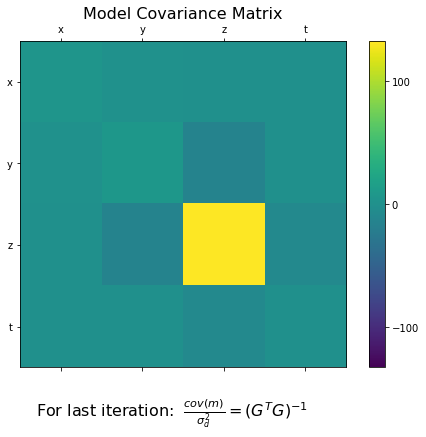

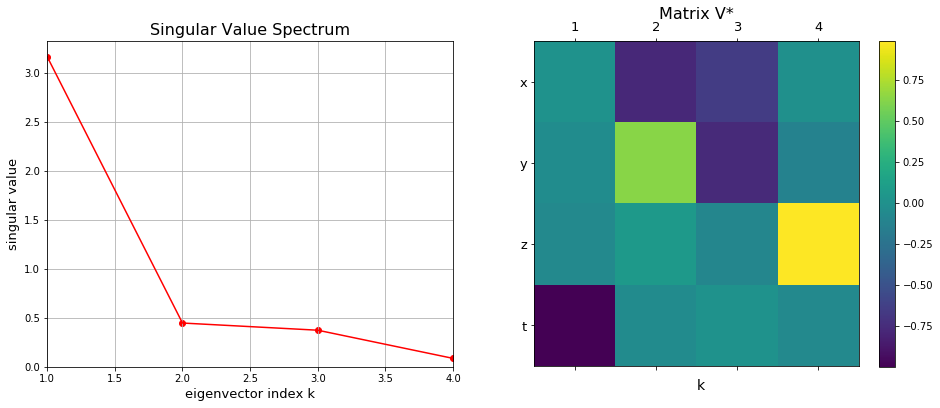

In [3]:
print('Model covariance matrix cov[m]: cov[d] * inverse(transpose(G)*G)' )
print(cv,'\n')
print('Normalized model covariance matrix cov[m]/sigma_d = inv(transpose(G)*G):')
print(CVM,'\n')
print('Singular values (for last iteration)')
print(L.diagonal(),'\n')
print('Model eigenvectors (matrix V, for last iteration):')
print('     v1          v2          v3          v4')
print(V)
print()
print()

####MODEL COVARIANCE Matrix###
mx1 = -1 * CVM.min()
mx2 =  CVM.max()
cmx = max(mx1,mx2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

ax.matshow(CVM, vmin=-cmx, vmax=cmx)
CT = ax.matshow(CVM, vmin=-cmx, vmax=cmx)

ax.text(-0.3, 4.1, 'For last iteration: '+ r' $\frac{cov(m)}{\sigma_{d}^{2}} = (G^{T} G)^{-1}$',fontsize=16)
ax.set_xticklabels( ['nan','x','y','z','t'])
ax.set_yticklabels( ['nan','x','y','z','t'])
ax.set_title('Model Covariance Matrix', fontsize=16)

fig.colorbar(CT,ticks=[-100, 0, 100])
plt.show()

##Singular Value Spectrum##
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

xlist = list(range(1,4 + 1))
axes[0].scatter(xlist, L.diagonal(), color='r')
axes[0].plot(xlist, L.diagonal(), color='r')
axes[0].set_xlim((1,4))
axes[0].set_ylim(0)

axes[0].set_ylabel('singular value', fontsize = 13)
axes[0].set_xlabel('eigenvector index k', fontsize = 13)
axes[0].set_title('Singular Value Spectrum', fontsize=16)

axes[0].grid(True)

##MATRIX V##
CV = ax.matshow(V)
axes[1].matshow(V)

axes[1].text(1.5, 3.8, 'k', fontsize=14)
axes[1].set_xticklabels( ['nan','1','2','3','4'], fontsize=13)
axes[1].set_yticklabels( ['nan','x','y','z','t'], fontsize=13)
axes[1].set_title('Matrix V*', fontsize=16)

fig.colorbar(CV)

plt.show()

<b>Note:</b>  
Matrix V: column k is the k-th eigenvector of the model parameter space (for last iteration)

<h3>Comprehension Questions:</h3>


1. Repeat steps 1. to 3. for <span style="font-family: Courier;">event2</span>, which is located outside the station network. How does this change the quality of your results and the covariance matrix?
2. The German Science Foundation grants you money for one additional seismic station. Where would you put it and why? There is no single or exact solution, but some ideas make more sense than others. Show evidence that this new station improves the performance of the network.
  
3. Singular Value Decomposition (SVD). This is a powerful method for understanding the projection behavior of the matrix, and thus the performance and quality of the inversion experiment. For an experiment with $K$ parameters to estimate, it computes $K$ singular values $s_{k}$ (scalar). Each $s_{k}$ is associated with a $K$-vector $v_{k}$, which represents a linear combination of the unknowns. In our case, we get $K$ = 4 singular values and four eigenvectors $v_{k}$. Each eigenvector has four elements that represent weighted combinations of the parameters ($x_{s}$, $y_{s}$, $z_{s}$, $t_{s}$). SVD predicts which model parameters can be recovered robustly in the presence of noise. If an eigenvector $v_{k}$ is associated with a large singular value $s_{k}$, then the estimate for this weighted combination of model parameters will not be strongly contaminated by propagating errors. The smaller the singular value, the less accurate we expect the estimate for the parameter combination $v_{k}$ to be. (In order to improve the robustness of an inverse problem, it is a common strategy to manipulate the matrix such that $v_{k}$ associated with small sk are not even allowed to contribute to the solution.)

   * Inspect the four singular values and the corresponding (4x4) matrix [$v_{k}$] (plot and screen output). For each of the four vectors, describe in words the relative weighting of parameters $x_{s}$, $y_{s}$, $z_{s}$, $t_{s}$ that they represent. According to SVD, which (combinations of) parameters should our seismic experiment be able to recover robustly? Which aspects of the earthquake source are most difficult to determine?
   * Are these predictions consistent with what you observed in part 1?
   * Do these findings make sense, considering the geometry of the experiment?
   * How is matrix [$v_{k}$] affected by whether the earthquake is located inside or outside the area covered by sensors?

---

<h2>Further Reading/Materials:</h2>
+ More on covariance matrices and error ellipse can be found on <a href='http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/'>Vincent Spruyt's blog</a>.  
+ Full <a href='https://github.com/joferkington/oost_paper_code/blob/master/error_ellipse.py'>source code</a> on how to find error ellipse.